<a href="https://colab.research.google.com/github/deva285/data-analytics-dn/blob/main/hr_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls -ltr /content/drive/MyDrive/dataset/dataset_csv/


total 52
dr-x------ 2 root root 4096 Feb 26  2022 dataset-titanic
dr-x------ 2 root root 4096 Feb 26  2022 dataset-powerlifting-csv
dr-x------ 2 root root 4096 Feb 26  2022 dataset_open_crime_uk
dr-x------ 2 root root 4096 Feb 26  2022 dataset-google-scholar
dr-x------ 2 root root 4096 Feb 26  2022 dataset_ebola
dr-x------ 2 root root 4096 Feb 26  2022 dataset-domestic-flights-from-1990-to-2009
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid-2
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid
dr-x------ 2 root root 4096 Feb 26  2022 dataset-airports
dr-x------ 2 root root 4096 Mar  5  2022 dataset-world-economy-worldbank
dr-x------ 2 root root 4096 Jun 21  2023 dataset-hr
dr-x------ 2 root root 4096 Nov 11  2023 dataset-forest-fire
dr-x------ 2 root root 4096 Jul 10 17:07 dataset-museum-artifacts


In [3]:
import csv
import re
import traceback
from tabulate import tabulate
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell # Capitalize 'I' in 'IPython'
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df= pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1.**How** many employees in each of the department (use column "sales")


In [ ]:
department_employee_count = df.groupby('sales').size().reset_index(name='num_employees')
department_employee_count.insert(0,("") , range(1, len(department_employee_count) + 1))
print("  employees in each of the department ")
print(tabulate(department_employee_count, headers='keys', tablefmt='grid', showindex=False))


  employees in each of the department 
+----+-------------+-----------------+
|    | sales       |   num_employees |
+====+=============+=================+
|  1 | IT          |            1227 |
+----+-------------+-----------------+
|  2 | RandD       |             787 |
+----+-------------+-----------------+
|  3 | accounting  |             767 |
+----+-------------+-----------------+
|  4 | hr          |             739 |
+----+-------------+-----------------+
|  5 | management  |             630 |
+----+-------------+-----------------+
|  6 | marketing   |             858 |
+----+-------------+-----------------+
|  7 | product_mng |             902 |
+----+-------------+-----------------+
|  8 | sales       |            4140 |
+----+-------------+-----------------+
|  9 | support     |            2229 |
+----+-------------+-----------------+
| 10 | technical   |            2720 |
+----+-------------+-----------------+


*2.Among employees who left, get the department wise (use column "sales"), number of employees and rank them.*

In [5]:
left_employees_department = df[df['left'] == 1].groupby('sales').size().reset_index(name='num_employees')
left_employees_department['rank'] = left_employees_department['num_employees'].rank(ascending=False)
left_employees_department.insert(0, 'Serial No', range(1, len(left_employees_department) + 1))
print("\nDepartment-wise Employee Count of Employees Who Left and Their Rank")
print(tabulate(left_employees_department, headers='keys', tablefmt='grid', showindex=False))


Department-wise Employee Count of Employees Who Left and Their Rank
+-------------+-------------+-----------------+--------+
|   Serial No | sales       |   num_employees |   rank |
+=============+=============+=================+========+
|           1 | IT          |             273 |      4 |
+-------------+-------------+-----------------+--------+
|           2 | RandD       |             121 |      9 |
+-------------+-------------+-----------------+--------+
|           3 | accounting  |             204 |      6 |
+-------------+-------------+-----------------+--------+
|           4 | hr          |             215 |      5 |
+-------------+-------------+-----------------+--------+
|           5 | management  |              91 |     10 |
+-------------+-------------+-----------------+--------+
|           6 | marketing   |             203 |      7 |
+-------------+-------------+-----------------+--------+
|           7 | product_mng |             198 |      8 |
+-------------+----

3.*Average number of years (time_spend_company) and average number of monthly hours (average_monthly_hours) for the employees left and not left under each department. Sort the value by sales.*

In [6]:
avg_time_hours = df.groupby(['sales', 'left']).agg(
    avg_time_spend_company=('time_spend_company', 'mean'),
    avg_average_monthly_hours=('average_montly_hours', 'mean')
).reset_index()
heatmap_data = avg_time_hours.pivot(index='sales', columns='left', values=['avg_time_spend_company', 'avg_average_monthly_hours'])

heatmap_data_reset = heatmap_data.reset_index()

heatmap_data_reset.insert(0, 'Serial No', range(1, len(heatmap_data_reset) + 1))

print("\nHeatmap Data for Average Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(heatmap_data_reset, headers='keys', tablefmt='grid', showindex=False))


Heatmap Data for Average Time Spent and Monthly Hours by Department and Left Status
+---------------------+-----------------+---------------------------------+---------------------------------+------------------------------------+------------------------------------+
|   ('Serial No', '') | ('sales', '')   |   ('avg_time_spend_company', 0) |   ('avg_time_spend_company', 1) |   ('avg_average_monthly_hours', 0) |   ('avg_average_monthly_hours', 1) |
+=====================+=================+=================================+=================================+====================================+====================================+
|                   1 | IT              |                         3.35639 |                         3.86081 |                            198.887 |                            213.85  |
+---------------------+-----------------+---------------------------------+---------------------------------+------------------------------------+---------------------------------

6.*Under each department, what is the total count (sum) on work accidents (work_accident) and promotion for the last 5 years (promotion_last_5years) for both left and not left. Sort the value by sales.*

In [9]:
accident_promotion_stats = df.groupby(["left", "sales"]).agg(
    count_work_accident=("Work_accident", "sum"),
    count_promotion_last_5years=("promotion_last_5years", "sum")
).reset_index()


accident_promotion_stats_sorted = accident_promotion_stats.sort_values(by="sales")

accident_promotion_stats_sorted.insert(0, 'Serial No', range(1, len(accident_promotion_stats_sorted) + 1))

print("\nCount of Work Accidents and Promotions by Department and Left Status")
print(tabulate(accident_promotion_stats_sorted, headers='keys', tablefmt='grid', showindex=False))


Count of Work Accidents and Promotions by Department and Left Status
+-------------+--------+-------------+-----------------------+-------------------------------+
|   Serial No |   left | sales       |   count_work_accident |   count_promotion_last_5years |
+=============+========+=============+=======================+===============================+
|           1 |      0 | IT          |                   155 |                             0 |
+-------------+--------+-------------+-----------------------+-------------------------------+
|           2 |      1 | IT          |                     9 |                             3 |
+-------------+--------+-------------+-----------------------+-------------------------------+
|           3 |      0 | RandD       |                   124 |                            27 |
+-------------+--------+-------------+-----------------------+-------------------------------+
|           4 |      1 | RandD       |                    10 |             

*5.Under each department, what is the minimum, maximum, average on last evaluation (last_evaluation) and satisfaction level (satisfaction_level) for both left and not left. Sort the value by sales.*

In [10]:
eval_satisfaction_stats = df.groupby(["sales", "left"]).agg(
    min_last_evaluation=("last_evaluation", "min"),
    max_last_evaluation=("last_evaluation", "max"),
    avg_last_evaluation=("last_evaluation", "mean"),
    min_satisfaction_level=("satisfaction_level", "min"),
    max_satisfaction_level=("satisfaction_level", "max"),
    avg_satisfaction_level=("satisfaction_level", "mean")
).reset_index()

eval_satisfaction_stats_sorted = eval_satisfaction_stats.sort_values(by="sales")

eval_satisfaction_stats_sorted.insert(0, 'Serial No', range(1, len(eval_satisfaction_stats_sorted) + 1))


print("\nEvaluation and Satisfaction Statistics by Department and Left Status")
print(tabulate(eval_satisfaction_stats_sorted, headers='keys', tablefmt='grid', showindex=False))


Evaluation and Satisfaction Statistics by Department and Left Status
+-------------+-------------+--------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|   Serial No | sales       |   left |   min_last_evaluation |   max_last_evaluation |   avg_last_evaluation |   min_satisfaction_level |   max_satisfaction_level |   avg_satisfaction_level |
+=============+=============+========+=======================+=======================+=======================+==========================+==========================+==========================+
|           1 | IT          |      0 |                  0.37 |                     1 |              0.71305  |                     0.12 |                     1    |                 0.67717  |
+-------------+-------------+--------+-----------------------+-----------------------+-----------------------+--------------------------+-------------------------

*4.Under each department, what is the minimum and maximum for both left and not left employees related to time_spend_company and average_monthly_hours. Sort the value by sales.*

In [11]:
min_max_time_hours = df.groupby(["left", "sales"]).agg(
    min_time_spend_company=("time_spend_company", "min"),
    max_time_spend_company=("time_spend_company", "max"),
    min_average_montly_hours=("average_montly_hours", "min"),
    max_average_montly_hours=("average_montly_hours", "max")
).reset_index()


min_max_time_hours_sorted = min_max_time_hours.sort_values(by="sales")

min_max_time_hours_sorted.insert(0, 'Serial No', range(1, len(min_max_time_hours_sorted) + 1))

print("\nMinimum and Maximum Time Spent and Monthly Hours by Department and Left Status")
print(tabulate(min_max_time_hours_sorted, headers='keys', tablefmt='grid', showindex=False))



Minimum and Maximum Time Spent and Monthly Hours by Department and Left Status
+-------------+--------+-------------+--------------------------+--------------------------+----------------------------+----------------------------+
|   Serial No |   left | sales       |   min_time_spend_company |   max_time_spend_company |   min_average_montly_hours |   max_average_montly_hours |
+=============+========+=============+==========================+==========================+============================+============================+
|           1 |      0 | IT          |                        2 |                       10 |                         96 |                        287 |
+-------------+--------+-------------+--------------------------+--------------------------+----------------------------+----------------------------+
|           2 |      1 | IT          |                        2 |                        6 |                        127 |                        308 |
+-------------

*7.Bring the output from question 3-6 above*

In [12]:
a1 = avg_time_hours
a2 = min_max_time_hours
a3 = eval_satisfaction_stats
a4 = accident_promotion_stats
merged_df = pd.merge(a1, a2, on=['sales', 'left'])
merged_df = pd.merge(merged_df, a3, on=['sales', 'left'])
merged_df = pd.merge(merged_df, a4, on=['sales', 'left'])
print("\nMerged DataFrame with all statistics")
print(tabulate(merged_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Merged DataFrame with all statistics
╒═════════════╤════════╤══════════════════════════╤═════════════════════════════╤══════════════════════════╤══════════════════════════╤════════════════════════════╤════════════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╤═══════════════════════╤═══════════════════════════════╕
│ sales       │   left │   avg_time_spend_company │   avg_average_monthly_hours │   min_time_spend_company │   max_time_spend_company │   min_average_montly_hours │   max_average_montly_hours │   min_last_evaluation │   max_last_evaluation │   avg_last_evaluation │   min_satisfaction_level │   max_satisfaction_level │   avg_satisfaction_level │   count_work_accident │   count_promotion_last_5years │
╞═════════════╪════════╪══════════════════════════╪═════════════════════════════╪══════════════════════════╪══════════════════════════╪═════════════════════

8.*Using output from the question 7 above, plot them as a grouped bar chart (similar to this or see group bar chart below) with seaborn. There must be two bars, one bar representing left and another for not left. This plot is for each unique department values in column “sales.*

<Figure size 800x600 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Grouped Bar Chart')

Text(0.5, 0, 'sales')

Text(0, 0.5, 'avg_time_spend_money')

([0, 1, 2, 3],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'left'),
  Text(2, 0, 'avg_time_spend_money'),
  Text(3, 0, 'avg_average_monthly_hours')])

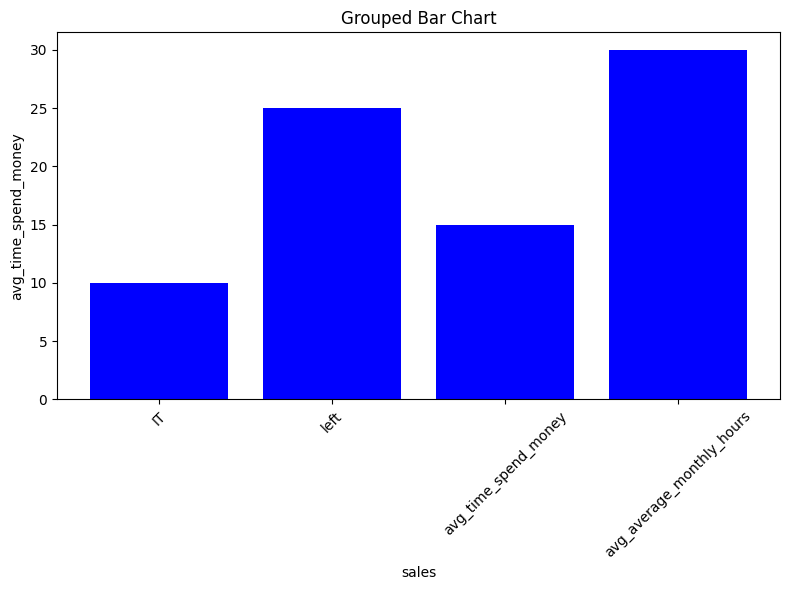

In [19]:
import matplotlib.pyplot as plt
data = {
    "IT": 10,
    "left": 25,
    "avg_time_spend_money": 15,
    "avg_average_monthly_hours": 30
}
sales = list(data.keys())
avg_time_spend_money = list(data.values())
plt.figure(figsize=(8, 6))
plt.bar(sales , avg_time_spend_money, color="blue")
plt.title("Grouped Bar Chart")
plt.xlabel("sales")
plt.ylabel("avg_time_spend_money")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()